In [190]:
import numpy as np
import pandas as pd
import time as tm
import datetime as dt
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
import ast
import json

svdPath = 'comparison/svd.csv'
df_svd = pd.read_csv(svdPath, sep=',')

knnbuPath = 'comparison/knn_basic_ub.csv'
df_knnbu = pd.read_csv(knnbuPath, sep=',')

knnbiPath = 'comparison/knn_basic_ib.csv'
df_knnbi = pd.read_csv(knnbiPath, sep=',')

knnmuPath = 'comparison/knn_means_ub.csv'
df_knnmu = pd.read_csv(knnmuPath, sep=',')

knnmiPath = 'comparison/knn_means_ib.csv'
df_knnmi = pd.read_csv(knnmiPath, sep=',')

knnzuPath = 'comparison/knn_zscore_ub.csv'
df_knnzu = pd.read_csv(knnzuPath, sep=',')

knnziPath = 'comparison/knn_zscore_ib.csv'
df_knnzi = pd.read_csv(knnziPath, sep=',')

ccPath = 'comparison/co_clustering.csv'
df_cc = pd.read_csv(ccPath, sep=',')

print('done')

done


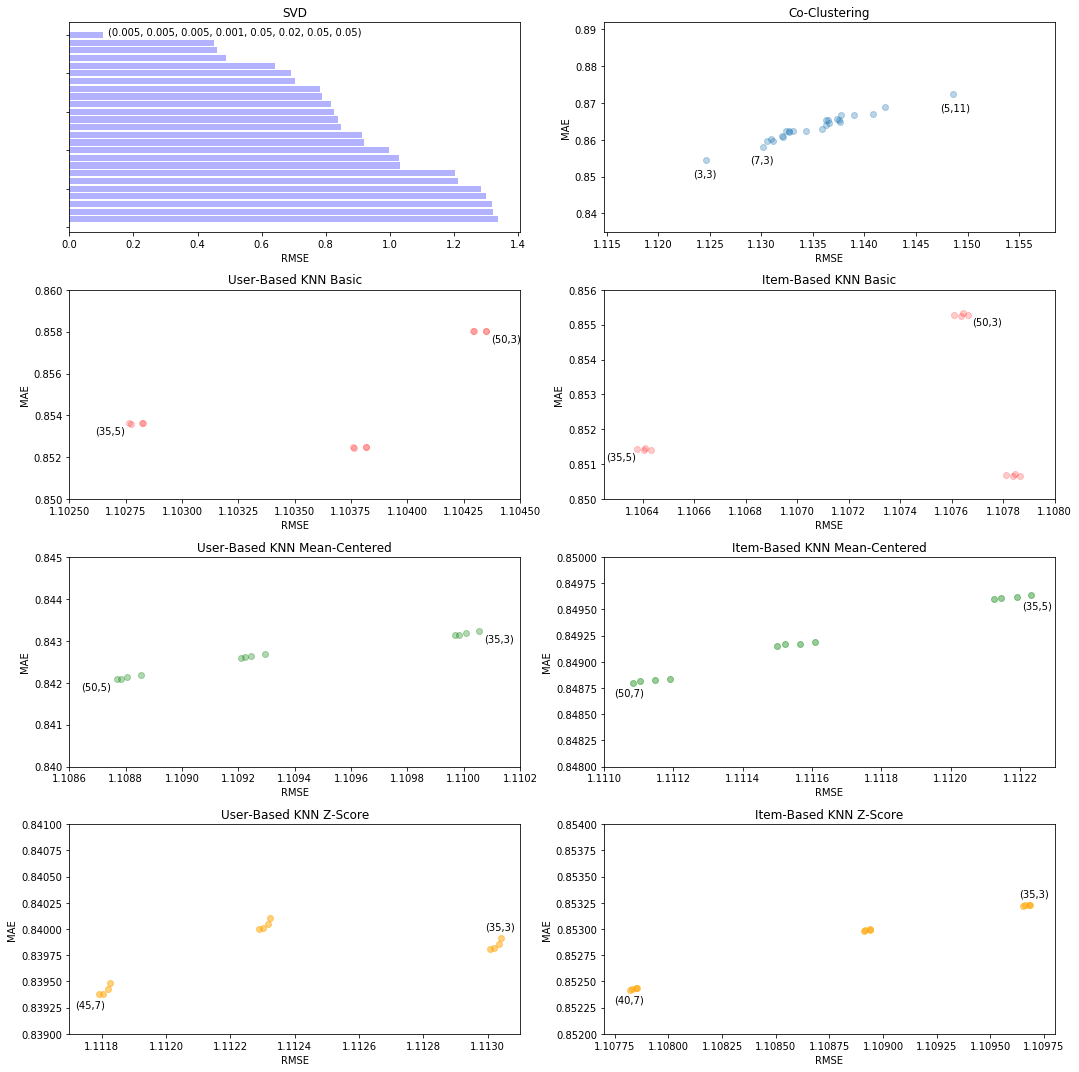

done


In [194]:
fig, axs = plt.subplots(4,2,figsize=(15,15))

x_svd, y_svd = df_svd['rmse'][:25].apply(lambda x:(x-1)*1000), np.arange(25)
axs[0,0].barh(y=y_svd, width=x_svd, color='blue', alpha=0.3)
axs[0,0].invert_yaxis()
axs[0,0].set_title('SVD')
axs[0,0].set_xlabel('RMSE')
axs[0,0].set_yticklabels([df_svd['rmse'][0],_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,df_svd['rmse'][24]])
axs[0,0].annotate(s='({}, {}, {}, {}, {}, {}, {}, {})'.format(df_svd['lr_bu'][0],df_svd['lr_bi'][0],df_svd['lr_pu'][0],
                                                     df_svd['lr_qi'][0],df_svd['reg_bu'][0],df_svd['reg_bi'][0],
                                                     df_svd['reg_pu'][0],df_svd['reg_qi'][0]),xy=(0,0),xytext=(0.12,0))

x_cc, y_cc, u_cc, i_cc = df_cc['rmse'], df_cc['mae'], df_cc['n_cltr_u'], df_cc['n_cltr_i']
axs[0,1].scatter(x=x_cc, y=y_cc, alpha=0.3)
axs[0,1].set_title('Co-Clustering')
axs[0,1].set_xlabel('RMSE')
axs[0,1].set_ylabel('MAE')
for i in (0,9,10):
    axs[0,1].annotate(s='({},{})'.format(u_cc[i],i_cc[i]),xy=(x_cc[i],y_cc[i]),xytext=(x_cc[i]-0.00125,y_cc[i]-0.0045))

x_knnbu, y_knnbu, k_knnbu, m_knnbu = df_knnbu['rmse'], df_knnbu['mae'], df_knnbu['k'], df_knnbu['min_k']
axs[1,0].scatter(x=x_knnbu, y=y_knnbu, alpha=0.2, color='red')
axs[1,0].set_title('User-Based KNN Basic')
axs[1,0].set_xlabel('RMSE')
axs[1,0].set_ylabel('MAE')
axs[1,0].set_xlim(1.1025,1.1045)
axs[1,0].set_ylim(0.85,0.86)
axs[1,0].annotate(s='({},{})'.format(k_knnbu[1],m_knnbu[1]),xy=(x_knnbu[1],y_knnbu[1]),
                  xytext=(x_knnbu[1]-0.00015,y_knnbu[1]-0.0005))
axs[1,0].annotate(s='({},{})'.format(k_knnbu[9],m_knnbu[9]),xy=(x_knnbu[9],y_knnbu[9]),
                  xytext=(x_knnbu[9]+0.00002,y_knnbu[9]-0.0005))

x_knnbi, y_knnbi, k_knnbi, m_knnbi = df_knnbi['rmse'], df_knnbi['mae'], df_knnbi['k'], df_knnbi['min_k']
axs[1,1].scatter(x=x_knnbi, y=y_knnbi, alpha=0.2, color='red')
axs[1,1].set_title('Item-Based KNN Basic')
axs[1,1].set_xlabel('RMSE')
axs[1,1].set_ylabel('MAE')
axs[1,1].set_xlim(1.10625,1.108)
axs[1,1].set_ylim(0.85,0.856)
axs[1,1].annotate(s='({},{})'.format(k_knnbi[1],m_knnbi[1]),xy=(x_knnbi[1],y_knnbi[1]),
                  xytext=(x_knnbi[1]-0.00012,y_knnbi[1]-0.0003))
axs[1,1].annotate(s='({},{})'.format(k_knnbi[9],m_knnbi[9]),xy=(x_knnbi[9],y_knnbi[9]),
                  xytext=(x_knnbi[9]+0.000016,y_knnbi[9]-0.00028))

x_knnmu, y_knnmu, k_knnmu, m_knnmu = df_knnmu['rmse'], df_knnmu['mae'], df_knnmu['k'], df_knnmu['min_k']
axs[2,0].scatter(x=x_knnmu, y=y_knnmu, alpha=0.3, color='green')
axs[2,0].set_title('User-Based KNN Mean-Centered')
axs[2,0].set_xlabel('RMSE')
axs[2,0].set_ylabel('MAE')
axs[2,0].set_xlim(1.1086,1.1102)
axs[2,0].set_ylim(0.84,0.845)
axs[2,0].annotate(s='({},{})'.format(k_knnmu[10],m_knnmu[10]),xy=(x_knnmu[10],y_knnmu[10]),
                  xytext=(x_knnmu[10]-0.000125,y_knnmu[10]-0.00025))
axs[2,0].annotate(s='({},{})'.format(k_knnmu[0],m_knnmu[0]),xy=(x_knnmu[0],y_knnmu[0]),
                  xytext=(x_knnmu[0]+0.00002,y_knnmu[0]-0.00025))

x_knnmi, y_knnmi, k_knnmi, m_knnmi = df_knnmi['rmse'], df_knnmi['mae'], df_knnmi['k'], df_knnmi['min_k']
axs[2,1].scatter(x=x_knnmi, y=y_knnmi, alpha=0.4, color='green')
axs[2,1].set_title('Item-Based KNN Mean-Centered')
axs[2,1].set_xlabel('RMSE')
axs[2,1].set_ylabel('MAE')
axs[2,1].set_xlim(1.111,1.1123)
axs[2,1].set_ylim(0.848,0.85)
axs[2,1].annotate(s='({},{})'.format(k_knnmi[11],m_knnmi[11]),xy=(x_knnmi[11],y_knnmi[11]),
                  xytext=(x_knnmi[11]-0.000055,y_knnmi[11]-0.000125))
axs[2,1].annotate(s='({},{})'.format(k_knnmi[1],m_knnmi[1]),xy=(x_knnmi[1],y_knnmi[1]),
                  xytext=(x_knnmi[1]-0.000025,y_knnmi[1]-0.000125))

x_knnzu, y_knnzu, k_knnzu, m_knnzu = df_knnzu['rmse'], df_knnzu['mae'], df_knnzu['k'], df_knnzu['min_k']
axs[3,0].scatter(x=x_knnzu, y=y_knnzu, alpha=0.5, color='orange')
axs[3,0].set_title('User-Based KNN Z-Score')
axs[3,0].set_xlabel('RMSE')
axs[3,0].set_ylabel('MAE')
axs[3,0].set_xlim(1.1117,1.1131)
axs[3,0].set_ylim(0.839,0.841)
axs[3,0].annotate(s='({},{})'.format(k_knnzu[8],m_knnzu[8]),xy=(x_knnzu[8],y_knnzu[8]),
                  xytext=(x_knnzu[8]-0.000075,y_knnzu[8]-0.000125))
axs[3,0].annotate(s='({},{})'.format(k_knnzu[0],m_knnzu[0]),xy=(x_knnzu[0],y_knnzu[0]),
                  xytext=(x_knnzu[0]-0.00005,y_knnzu[0]+0.000075))

x_knnzi, y_knnzi, k_knnzi, m_knnzi = df_knnzi['rmse'], df_knnzi['mae'], df_knnzi['k'], df_knnzi['min_k']
axs[3,1].scatter(x=x_knnzi, y=y_knnzi, alpha=0.5, color='orange')
axs[3,1].set_title('Item-Based KNN Z-Score')
axs[3,1].set_xlabel('RMSE')
axs[3,1].set_ylabel('MAE')
axs[3,1].set_xlim(1.1077,1.1098)
axs[3,1].set_ylim(0.852,0.854)
axs[3,1].annotate(s='({},{})'.format(k_knnzi[5],m_knnzi[5]),xy=(x_knnzi[5],y_knnzi[5]),
                  xytext=(x_knnzi[5]-0.000075,y_knnzi[5]-0.000125))
axs[3,1].annotate(s='({},{})'.format(k_knnzi[0],m_knnzi[0]),xy=(x_knnzi[0],y_knnzi[0]),
                  xytext=(x_knnzi[0]-0.00005,y_knnzi[0]+0.000075))

fig.tight_layout()
plt.savefig('comparisons.png')
plt.show()

print('done')

In [249]:
uid = 103022570094091940058

rbuPath = 'data/filtered_reviews_by_user.csv'
df_rbu = pd.read_csv(rbuPath, sep=',')

placesPath = 'data/places_scc.csv'
df_places = pd.read_csv(placesPath, sep='\t')

recRawPath = 'recs/top20_svd_opt_raw.csv'
df_recRaw = pd.read_csv(recRawPath, sep=',')

recTimePath = 'recs/top20_svd_opt_time.csv'
df_recTime = pd.read_csv(recTimePath, sep=',')

recMeanPath = 'recs/top20_svd_opt_mean.csv'
df_recMean = pd.read_csv(recMeanPath, sep=',')

recMeanTimePath = 'recs/top20_svd_opt_meantime.csv'
df_recMeanTIme = pd.read_csv(recMeanTimePath, sep=',')

rt = df_rbu[df_rbu['gPlusUserId'] == str(uid)]
for p in rt['gPlusPlaceId'].array:
    s = df_places[df_places['gPlusPlaceId'] == str(p)]['name'].array[0][2:-1]
    print(s)
    
print('\n\n\n')

rc_raw = df_recRaw[df_recRaw['uid'] == str(uid)].squeeze().tolist()[1:]
for p in rc_raw:
    s = df_places[df_places['gPlusPlaceId'] == str(p)]['name'].array[0][2:-1]
    print(s)
    
print('\n\n\n')

rc_time = df_recTime[df_recTime['uid'] == str(uid)].squeeze().tolist()[1:]
for p in rc_time:
    s = df_places[df_places['gPlusPlaceId'] == str(p)]['name'].array[0][2:-1]
    print(s)

print('\n\n\n')

rc_mean = df_recMean[df_recMean['uid'] == str(uid)].squeeze().tolist()[1:]
for p in rc_mean:
    s = df_places[df_places['gPlusPlaceId'] == str(p)]['name'].array[0][2:-1]
    print(s)

print('\n\n\n')

rc_meantime = df_recMeanTIme[df_recMeanTIme['uid'] == str(uid)].squeeze().tolist()[1:]
for p in rc_meantime:
    s = df_places[df_places['gPlusPlaceId'] == str(p)]['name'].array[0][2:-1]
    print(s)

print('\n\n\n')

counts = defaultdict(int)
for p in rc_raw + rc_time + rc_mean + rc_meantime:
    counts[p] += 1
l = sorted(list(counts.items()),key=lambda x:x[1],reverse=True)
for e in l:
    s = df_places[df_places['gPlusPlaceId'] == str(e[0])]['name'].array[0][2:-1]
    print('{} {}'.format(e[1], s))

print('done')

Maxim Market
Mission College
Westfield Oakridge
Grand Century Shopping Mall
Dakao Restaurant
Costco
Maxim Market III
Fallas Discount Stores
Educational Park Branch Library
Westfield Valley Fair
Target
Lion Supermarket
Safeway
Pho 90 Degree
Shun Fat Supermarket
De Anza College
Mc Kee Oriental Market
Food Bowl 99




FCC Collision Centers
KAL Financial
Lexus of Stevens Creek
European Wax Center - Mountain View
Golden State Appliance Repair
Aborn Properties
Gulzaar Halaal Restaurant & Bakery
Tin Pot Creamery
Auto Care Specialists
Public Storage
DataRetrieval Data Recovery Service San Jose
Bumble
Pelle Heating & Air Conditioning
Public Storage
Any Water Sports
Sheila's Hair & Makeup
Dr. Martin Luther King, Jr. Library
Kiddie Kountry Pre-School
Peninsula Dental Excellence
OnRevenue.com




Public Storage
Public Storage
Public Storage
Public Storage
Berg Injury Lawyers
Public Storage
Atlas Trillo Heating & Air Conditioning
Public Storage
Stevens Creek Subaru
European Wax Center - San Jose Th